### Final project : Part 2
#### Team: Runtime Terrors
#### Name: Vinu Prasad Bhambore (vpb2)

In [1]:
#Importing packages

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Loading the dataset
shooting_data = pd.read_excel("Mother Jones - Mass Shootings Database, 1982 - 2019.xlsx")
print(shooting_data.columns, "\n") #Printing all the columns in the dataset
print("Shape of the data: ", shooting_data.shape) #Priniting the dataset dimensions
shooting_data.head(5)

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object') 

Shape of the data:  (115, 24)


,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Odessa-Midland shooting spree,"Odessa, Texas",2019-08-31,"Seth A. Ator, 36, fired at police officers who...",7,25,32,Other,36,yes,...,-,White,M,https://www.washingtonpost.com/politics/5-kill...,https://www.nytimes.com/2019/09/02/us/texas-gu...,-,31.925974,-102.279600,Spree,2019
1,Dayton entertainment district shooting,"Dayton, Ohio",2019-08-04,"Connor Betts, 24, died during the attack, foll...",9,27,36,Other,24,-,...,"AR-15-style rifle, with a 100-round capacity a...",White,M,https://www.nytimes.com/2019/08/04/us/dayton-o...,-,-,39.757312,-84.184947,Mass,2019
2,El Paso Walmart mass shooting,"El Paso, Texas",2019-08-03,"Patrick Crusius, 21, who was apprehended by po...",22,26,48,Workplace,21,-,...,"AK-47-style rifle, per authorities",White,M,https://www.washingtonpost.com/nation/2019/08/...,-,-,31.771068,-106.375655,Mass,2019
3,Gilroy garlic festival shooting,"Gilroy, California",2019-07-28,"Santino William LeGan, 19, fired indiscriminat...",3,12,15,Other,19,TBD,...,"AK-47-style rifle, per authorities",-,M,https://www.cbsnews.com/live-news/garlic-festi...,-,-,36.997191,-121.584819,Mass,2019
4,Virginia Beach municipal building shooting,"Virginia Beach, Virginia",2019-05-31,"DeWayne Craddock, 40, a municipal city worker ...",12,4,16,Workplace,40,TBD,...,.45-caliber handguns; noise suppressor (silenc...,Black,M,https://www.washingtonpost.com/local/public-sa...,-,-,36.754420,-76.060378,Mass,2019


In [3]:
shooting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 24 columns):
case                                115 non-null object
location                            115 non-null object
date                                115 non-null datetime64[ns]
summary                             115 non-null object
fatalities                          115 non-null int64
injured                             115 non-null int64
total_victims                       115 non-null int64
location.1                          115 non-null object
age_of_shooter                      115 non-null int64
prior_signs_mental_health_issues    115 non-null object
mental_health_details               115 non-null object
weapons_obtained_legally            115 non-null object
where_obtained                      115 non-null object
weapon_type                         115 non-null object
weapon_details                      115 non-null object
race                                115 non-null ob

## Using Openrefine to clean the dataset
### The changes done are:
#### Columns: Case, Location, Summary, Location2, Mental health sources, Race, Gender, Sources, Mental health sources, Sources additional age, Type 
Changes: Trim leading and trailing white spaces, Collapse consecutive whitespace, column is converted to text type, Convert to title case, Created a cluster and merged similar values

#### Columns: Fatalities, Injured, Total_victims, Age of shooter, Latitude, Longitude, Year 
Changes: Column is converted to number type, created numeric facets to check the range (to make sure there were no invalid values like negative numbers)

#### Columns: Prior signs of mental health, Weapons obtained legally, Where obtained, Weapon type, Weapon details 
Changes: Created text facet and changed all the different values to either 'Yes', 'No', 'Unknown' and specific values, changed column to Titlecase


In [4]:
#Loading the cleaned dataset

shooting = pd.read_excel("Mother-Jones-Mass-Shootings-Database-1982-2019-Cleaned.xlsx") 
print("Shape of the data: ", shooting.shape) #Priniting the dataset dimensions
shooting.head(5)

Shape of the data:  (115, 24)


,case,location,date,summary,fatalities,injured,total_victims,location2,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Odessa-midland Shooting Spree,"Odessa, Texas",Sat Aug 31 00:00:00 CDT 2019,"Seth A. Ator, 36, fired at police officers who...",7,25,32,Other,36,Yes,...,Unknown,White,Male,https://www.washingtonpost.com/politics/5-kill...,https://www.nytimes.com/2019/09/02/us/texas-gu...,-,31.925974,-102.279600,Spree,2019
1,Dayton Entertainment District Shooting,"Dayton, Ohio",Sun Aug 04 00:00:00 CDT 2019,"Connor Betts, 24, died during the attack, foll...",9,27,36,Other,24,Unknown,...,"AR-15-style rifle, with a 100-round capacity a...",White,Male,https://www.nytimes.com/2019/08/04/us/dayton-o...,-,-,39.757312,-84.184947,Mass,2019
2,El Paso Walmart Mass Shooting,"El Paso, Texas",Sat Aug 03 00:00:00 CDT 2019,"Patrick Crusius, 21, who was apprehended by po...",22,26,48,Workplace,21,Unknown,...,"AK-47-style rifle, per authorities",White,Male,https://www.washingtonpost.com/nation/2019/08/...,-,-,31.771068,-106.375655,Mass,2019
3,Gilroy Garlic Festival Shooting,"Gilroy, California",Sun Jul 28 00:00:00 CDT 2019,"Santino William LeGan, 19, fired indiscriminat...",3,12,15,Other,19,Unknown,...,"AK-47-style rifle, per authorities",Unknown,Male,https://www.cbsnews.com/live-news/garlic-festi...,-,-,36.997191,-121.584819,Mass,2019
4,Virginia Beach Municipal Building Shooting,"Virginia Beach, Virginia",Fri May 31 00:00:00 CDT 2019,"DeWayne Craddock, 40, a municipal city worker ...",12,4,16,Workplace,40,Unknown,...,.45-caliber handguns; noise suppressor (silenc...,Black,Male,https://www.washingtonpost.com/local/public-sa...,-,-,36.754420,-76.060378,Mass,2019


In [5]:
sns.set(rc={'figure.figsize':(12,8)}) #Setting the size of the plot
sns.set(style="whitegrid")

### 1. Number of mass shootings grouped by gender for every year between 1982 - 2019

Text(0.5, 1.0, 'Number of mass shootings grouped by gender across years')

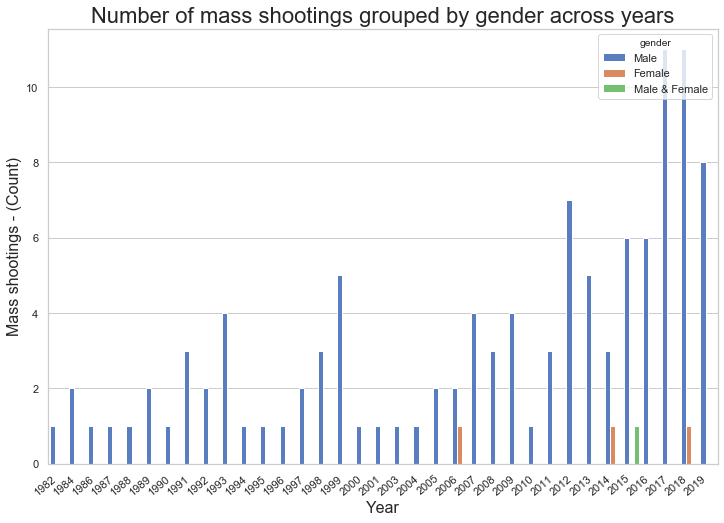

In [6]:
#Nested barplot to show gender breakdown of the shooters for every year between 1982 - 2019

g = sns.countplot(x="year", hue="gender", data=shooting, palette="muted") #Creating a count plot
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right") #Label showing years on x-axis
g.set_ylabel("Mass shootings - (Count)", fontsize=16) #Label for y-axis
g.set_xlabel("Year", fontsize=16) #Label for x-axis
g.set_title('Number of mass shootings grouped by gender across years',fontsize=22) #Title of the plot

### 2. Total victims grouped by race for years from 1982 to 2019

In [7]:
#Importing necessary package
import matplotlib.pyplot as plt

In [8]:
#Creating a dataset using groupby for the next visualization

race = shooting.groupby(["race", 'type'], as_index=False)['total_victims'].sum()
race = race.sort_values(by=['total_victims']) #Sorting the dataframe on total victims column
race

,race,type,total_victims
7,Native American,Spree,6
1,Asian,Spree,14
5,Latino,Spree,20
6,Native American,Mass,21
3,Black,Spree,38
4,Latino,Mass,57
9,Unknown,Mass,65
0,Asian,Mass,96
2,Black,Mass,159
11,White,Spree,184


Text(0.5, 1.0, 'Total Victims grouped by race of the shooter')

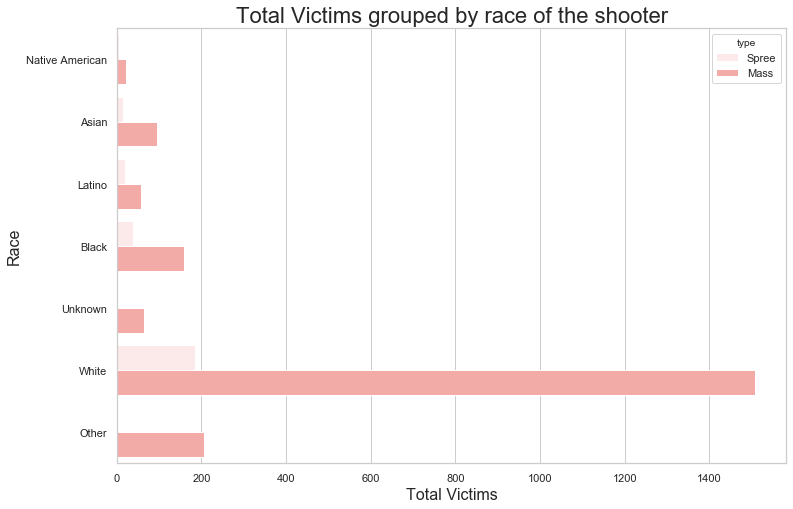

In [9]:
f, g2 = plt.subplots(figsize=(12, 8)) #Initializing the subplot
sns.set_color_codes("pastel")
g2 = sns.barplot(x="total_victims", y="race", hue="type", data=race, color="r") #Creating a bar plot
g2.set_ylabel("Race", fontsize=16) #Label for y-axis
g2.set_xlabel("Total Victims", fontsize=16) #Label for x-axis
g2.set_title('Total Victims grouped by race of the shooter',fontsize=22) #Title of the plot